In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = 'drive/My Drive/Orange_Malta_Dataset/Orange_Malta_Dataset_cropped_256x256'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
train_malta_dir = os.path.join(train_dir, 'malta')
train_orange_dir = os.path.join(train_dir, 'orange')

validation_malta_dir = os.path.join(validation_dir, 'malta')
validation_orange_dir = os.path.join(validation_dir, 'orange')

test_malta_dir = os.path.join(validation_dir, 'malta')
test_orange_dir = os.path.join(validation_dir, 'orange')

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
BATCH_SIZE = 64
TARGET_SIZE = (75, 75)

In [20]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        #target_size=TARGET_SIZE,  # All images will be resized to 150x150
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        shuffle=True,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 20160 images belonging to 2 classes.


In [21]:
train_generator.samples

20160

In [22]:
train_generator.image_shape

(256, 256, 1)

In [23]:
train_generator.num_classes

2

In [24]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        #target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary')

Found 2520 images belonging to 2 classes.


In [25]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        #target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='binary')

Found 2520 images belonging to 2 classes.


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    #tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [28]:
STEPS_PER_EPOCH = (train_generator.samples//BATCH_SIZE)
VALIDATION_STEPS = (validation_generator.samples//BATCH_SIZE)

print("STEPS_PER_EPOCH =", STEPS_PER_EPOCH)
print("VALIDATION_STEPS =", VALIDATION_STEPS)

STEPS_PER_EPOCH = 315
VALIDATION_STEPS = 39


In [29]:
history = model.fit(
      train_generator,
      steps_per_epoch=STEPS_PER_EPOCH,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=VALIDATION_STEPS,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
315/315 [==============================] - 7114s 23s/step - loss: 0.5678 - accuracy: 0.6796 - val_loss: 0.8340 - val_accuracy: 0.6242
Epoch 2/10
315/315 [==============================] - 50s 159ms/step - loss: 0.3058 - accuracy: 0.8702 - val_loss: 0.4226 - val_accuracy: 0.7196
Epoch 3/10
315/315 [==============================] - 50s 157ms/step - loss: 0.0999 - accuracy: 0.9632 - val_loss: 0.2497 - val_accuracy: 0.8698
Epoch 4/10
315/315 [==============================] - 50s 157ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 0.0532 - val_accuracy: 0.9788
Epoch 5/10
315/315 [==============================] - 50s 159ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.1291 - val_accuracy: 0.9327
Epoch 6/10
315/315 [==============================] - 50s 160ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.1870 - val_accuracy: 0.9054
Epoch 7/10
315/315 [==============================] - 50s 158ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0.0753 - val_ac

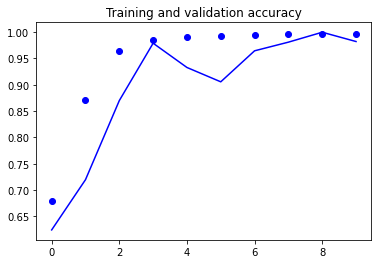

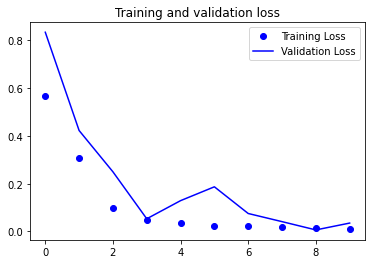

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()